https://mne.tools/stable/auto_tutorials/preprocessing/15_handling_bad_channels.html

In [35]:
import os
from copy import deepcopy
import numpy as np
import mne
%matplotlib qt
import matplotlib.pyplot as plt

In [48]:
# Load the data
from mne_bids import (BIDSPath,read_raw_bids)

# path where to save the datasets.
bids_root = "Dataset/ds004147"
subject_id = '28'


bids_path = BIDSPath(subject=subject_id,task="casinos",
                     datatype='eeg', suffix='eeg',
                     root=bids_root)

# read the file
raw = read_raw_bids(bids_path)
# fix the annotations readin
# ccs_eeg_utils.read_annotations_core(bids_path,raw)

raw.load_data()

Extracting parameters from Dataset\ds004147\sub-28\eeg\sub-28_task-casinos_eeg.vhdr...
Setting channel info structure...
Reading events from Dataset\ds004147\sub-28\eeg\sub-28_task-casinos_events.tsv.
The event "Stimulus" refers to multiple event values. Creating hierarchical event names.
    Renaming event: Stimulus -> Stimulus/S 31
    Renaming event: Stimulus -> Stimulus/S 32
    Renaming event: Stimulus -> Stimulus/S 33
    Renaming event: Stimulus -> Stimulus/S 35
    Renaming event: Stimulus -> Stimulus/S 37
    Renaming event: Stimulus -> Stimulus/S 31
    Renaming event: Stimulus -> Stimulus/S 32
    Renaming event: Stimulus -> Stimulus/S 33
    Renaming event: Stimulus -> Stimulus/S 34
    Renaming event: Stimulus -> Stimulus/S 37
    Renaming event: Stimulus -> Stimulus/S 31
    Renaming event: Stimulus -> Stimulus/S 32
    Renaming event: Stimulus -> Stimulus/S 33
    Renaming event: Stimulus -> Stimulus/S 35
    Renaming event: Stimulus -> Stimulus/S 36
    Renaming event: 

Measurement date,"March 21, 2022 14:57:52 GMT"
Experimenter,Unknown
Participant,sub-28
Digitized points,Not available
Good channels,31 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,1000.00 Hz
Highpass,0.00 Hz
Lowpass,280.00 Hz


In [49]:
print(raw.info["bads"])

[]


In [50]:
raw.pick(["eeg", "eog"]).load_data()
raw.info

Measurement date,"March 21, 2022 14:57:52 GMT"
Experimenter,Unknown
Participant,sub-28
Digitized points,Not available
Good channels,31 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,1000.00 Hz
Highpass,0.00 Hz
Lowpass,280.00 Hz


In [51]:
print(raw.ch_names)

['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'FCz', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'CPz', 'Cz', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'Fp2']


In [52]:
# hacky try to replicate pipelines "virtual EOG channels" with FP1, FP2
raw.set_channel_types({'Fp1':'eog', 'Fp2':'eog'})

Measurement date,"March 21, 2022 14:57:52 GMT"
Experimenter,Unknown
Participant,sub-28
Digitized points,Not available
Good channels,"2 EOG, 29 EEG"
Bad channels,None
EOG channels,"Fp1, Fp2"
ECG channels,Not available
Sampling frequency,1000.00 Hz
Highpass,0.00 Hz
Lowpass,280.00 Hz


In [53]:
picks = mne.pick_channels(raw.ch_names, include=[])
raw.plot(order=picks, n_channels=len(picks))
;

''

Traceback (most recent call last):
  File "C:\Users\Max\AppData\Roaming\Python\Python311\site-packages\matplotlib\cbook\__init__.py", line 304, in process
    func(*args, **kwargs)
  File "C:\Users\Max\AppData\Roaming\Python\Python311\site-packages\mne\viz\_mpl_figure.py", line 885, in _pick
    self._create_ch_context_fig(ind)
  File "C:\Users\Max\AppData\Roaming\Python\Python311\site-packages\mne\viz\_mpl_figure.py", line 888, in _create_ch_context_fig
    fig = super()._create_ch_context_fig(idx)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Max\AppData\Roaming\Python\Python311\site-packages\mne\viz\_figure.py", line 467, in _create_ch_context_fig
    fig = self._create_ch_location_fig(pick)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Max\AppData\Roaming\Python\Python311\site-packages\mne\viz\_figure.py", line 489, in _create_ch_location_fig
    _ = plot_sensors(
        ^^^^^^^^^^^^^
  File "<decorator-gen-100>", line 12, in plot_sensors
  File "C

Channels marked as bad:
none


In [21]:
# add bad channels to list

# raw.info["bads"].append("EEG 050")  # add a single channel
# raw.info["bads"].extend(["EEG 051", "EEG 052"])  # add a list of channels
# bad_chan = raw.info["bads"].pop(-1)  # remove the last entry in the list
# raw.info["bads"] = original_bads  # change the whole list at once

original_bads = deepcopy(raw.info["bads"])

# testing
# raw.info["bads"].extend([
#     "F7", 
#     "FC1"
# ])


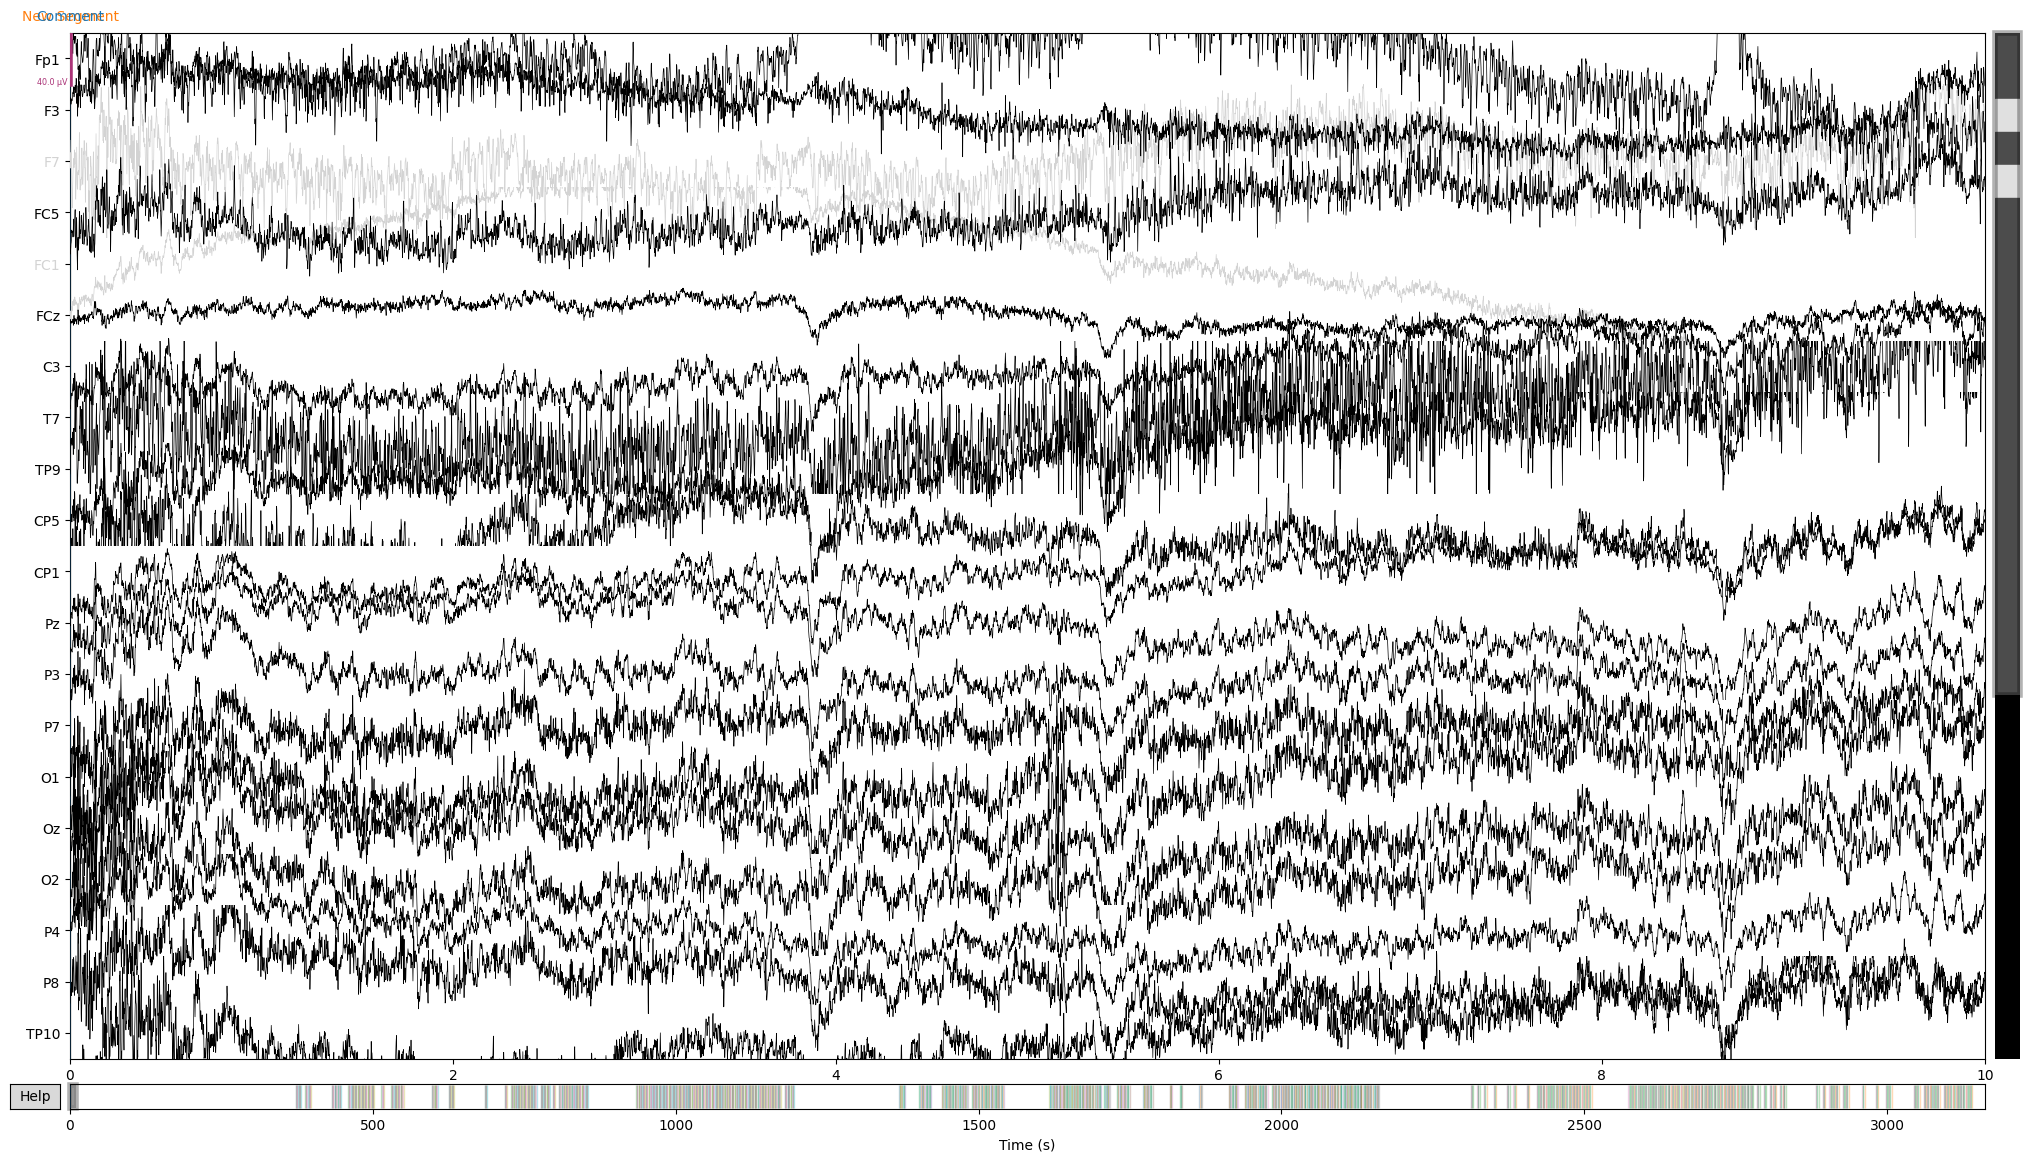

''

In [26]:
# interactively selecting bad channels
mne.viz.plot_raw(raw)
;

In [24]:
print(raw.info["bads"])

['F7', 'FC1']


In [25]:
# default is exclude='bads':
good_eeg = mne.pick_types(raw.info, meg=False, eeg=True)
all_eeg = mne.pick_types(raw.info, meg=False, eeg=True, exclude=[])
print(np.setdiff1d(all_eeg, good_eeg))
print(np.array(raw.ch_names)[np.setdiff1d(all_eeg, good_eeg)])

[2 4]
['F7' 'FC1']


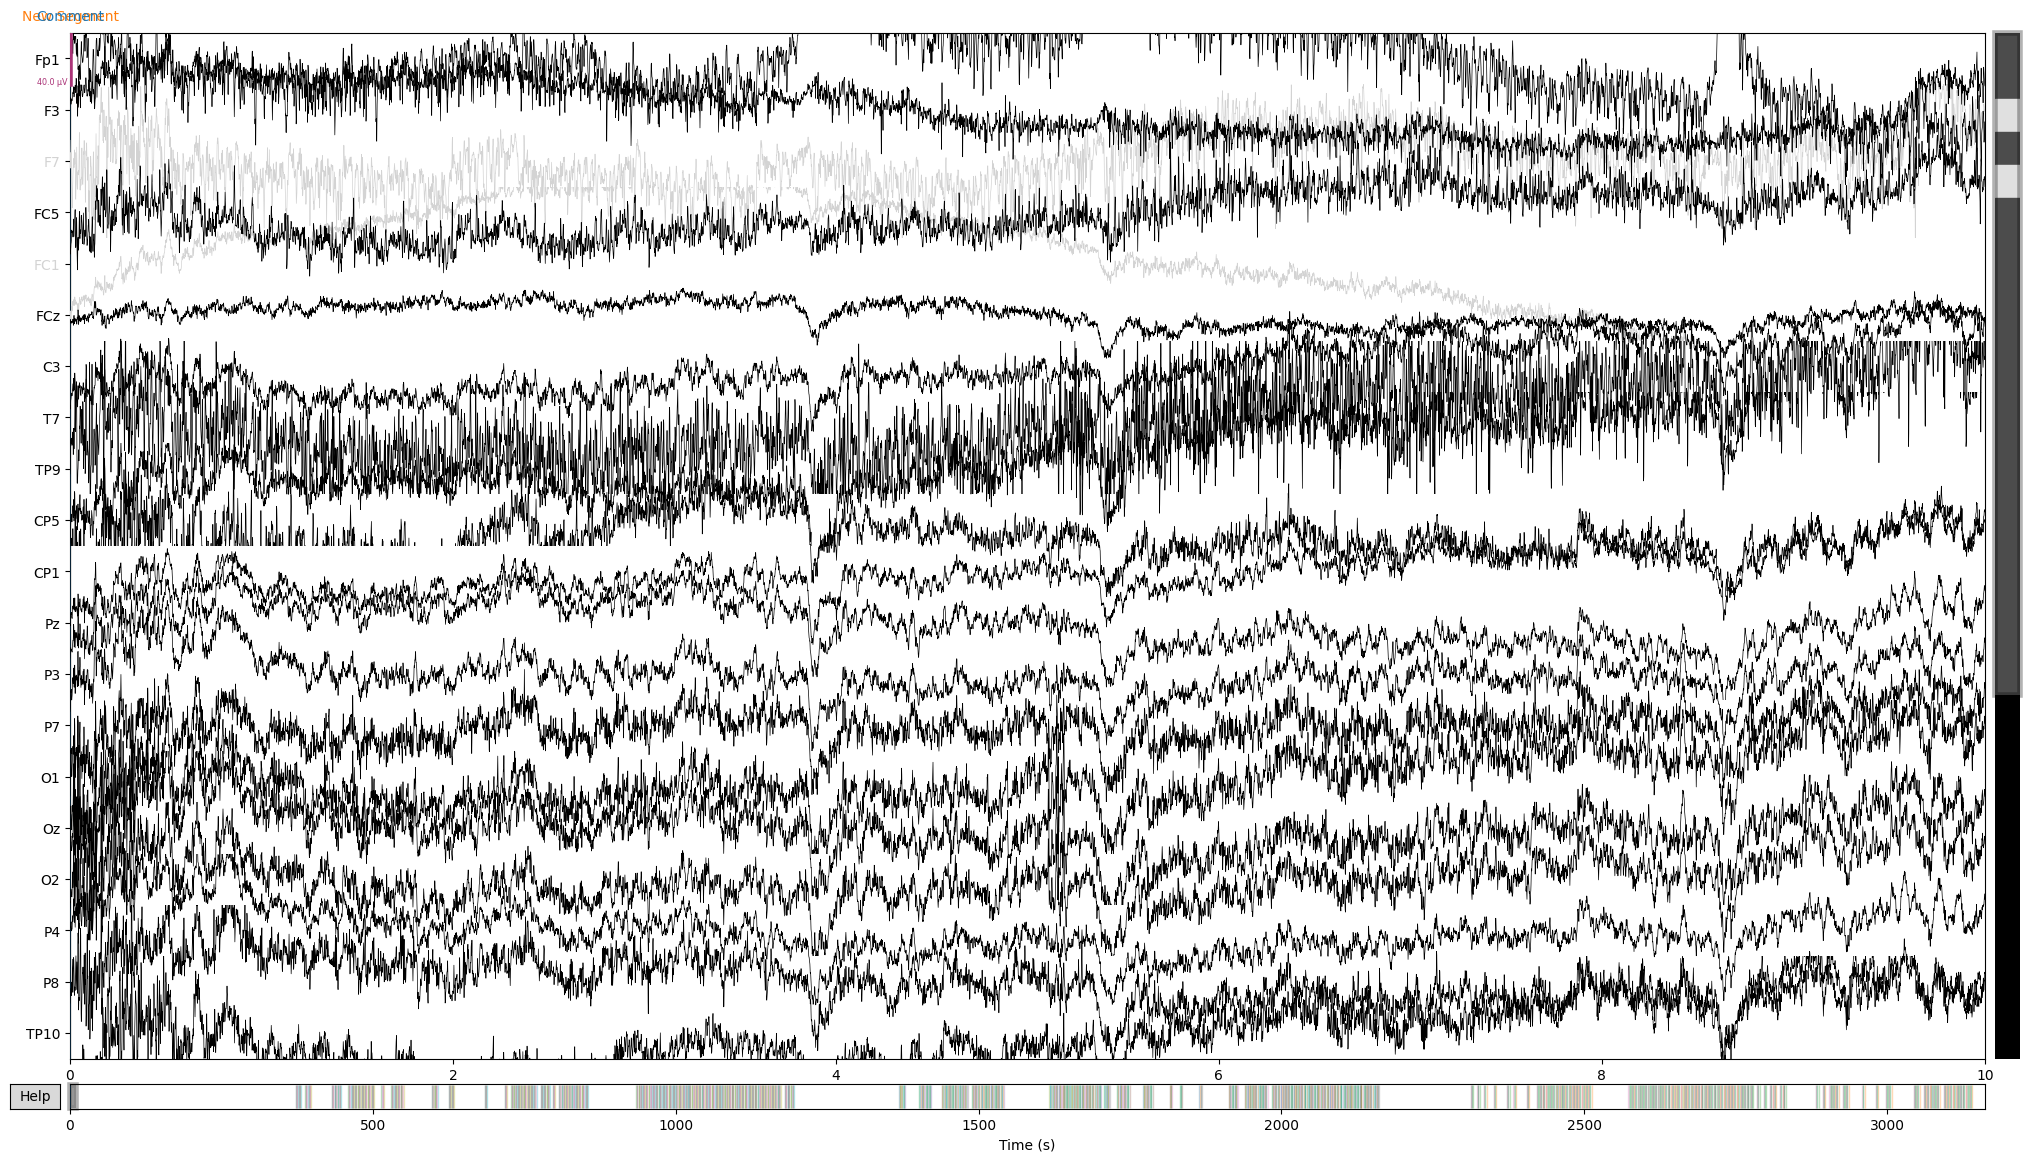

''

In [27]:
mne.viz.plot_raw(raw)
;